In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('./simulation_results_finished.csv')
df.head()

,Date,Dry-bulb temperature (°C),Total system energy (kBtu/h),System natural gas (kBtu/h),System electricity (kBtu/h),Total lights energy (kBtu/h),Lights electricity (kBtu/h),Total equip energy (kBtu/h),Equip electricity (kBtu/h),Total CE ex equip (kgCO2/h),...,Total electricity (kBtu/h),Total grid displaced elec. PV (kBtu/h),Total energy (kBtu/h),Transformer Losses (kBtu/h),Agile Import price (p/kWh),Agile Export price (p/kWh),DHW demand (kW),SH demand (kW),Total heat demand (kW),Ele demand (kW)
0,2023-01-01 00:00:00,5.5,7.460,7.325,0.135,0.0,0.0,2.912,2.912,0.5,...,3.048,0.0,10.372,0.0,4.41,2.77,0.274968,2.086286,2.361254,0.228635
1,2023-01-01 00:30:00,5.5,7.465,7.330,0.135,0.0,0.0,2.912,2.912,0.5,...,3.048,0.0,10.378,0.0,13.91,6.86,0.275170,2.086286,2.361455,0.228635
2,2023-01-01 01:00:00,5.5,7.468,7.333,0.135,0.0,0.0,2.912,2.912,0.5,...,3.048,0.0,10.380,0.0,15.44,7.52,0.275270,2.108282,2.383553,0.228635
3,2023-01-01 01:30:00,5.5,7.467,7.331,0.135,0.0,0.0,2.912,2.912,0.5,...,3.048,0.0,10.379,0.0,1.10,1.34,0.275213,2.108282,2.383495,0.228635
4,2023-01-01 02:00:00,5.5,7.465,7.330,0.135,0.0,0.0,2.912,2.912,0.5,...,3.048,0.0,10.378,0.0,6.70,3.76,0.275184,2.106590,2.381774,0.228635


In [4]:
df["Space heating demand (kWh)"] = df["Ap Sys boilers space cond\'g load (kW)"] * 0.5

In [5]:
np.sum(df["Space heating demand (kWh)"])

np.float64(2950.9061)

# Visualisation

## Any time period

In [6]:
# Filter DataFrame by Time Period

# Define the start and end time for the period you want to filter
start_time = '01-01-2023 00:00:00'
end_time = '31-12-2023 23:59:50'

# Convert the 'Date' column to datetime format if it's not already
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d %H:%M:%S')

# Filter the DataFrame to include only the data within the specified time period
filtered_df = df[(df['Date'] >= start_time) & (df['Date'] <= end_time)]

# Display the first few rows of the filtered DataFrame to verify the filtering
# filtered_df.head()

filtered_df.set_index('Date', inplace=True)

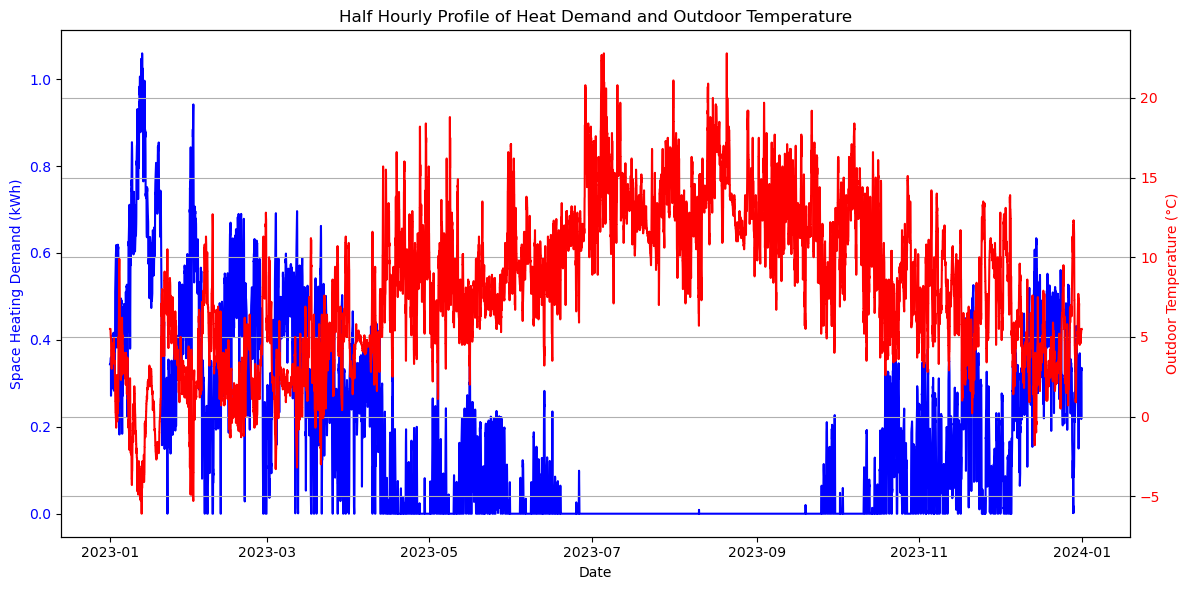

In [7]:
# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Heat Demand on the first y-axis
ax1.plot(filtered_df.index, filtered_df["Space heating demand (kWh)"], label='Half Hourly Heat Demand', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Space Heating Demand (kWh)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis
ax2 = ax1.twinx()
ax2.plot(filtered_df.index, filtered_df['Dry-bulb temperature (°C)'], label='Half Hourly Temperature', color='red')
ax2.set_ylabel('Outdoor Temperature (°C)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Title and grid
plt.title('Half Hourly Profile of Heat Demand and Outdoor Temperature')
fig.tight_layout()
plt.grid()
# plt.savefig('')
plt.show()

## Annual half hourly profile

In [8]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d %H:%M:%S')
df.set_index('Date', inplace=True)

In [9]:
df.head()

,Dry-bulb temperature (°C),Total system energy (kBtu/h),System natural gas (kBtu/h),System electricity (kBtu/h),Total lights energy (kBtu/h),Lights electricity (kBtu/h),Total equip energy (kBtu/h),Equip electricity (kBtu/h),Total CE ex equip (kgCO2/h),Total system CE (kgCO2/h),...,Total grid displaced elec. PV (kBtu/h),Total energy (kBtu/h),Transformer Losses (kBtu/h),Agile Import price (p/kWh),Agile Export price (p/kWh),DHW demand (kW),SH demand (kW),Total heat demand (kW),Ele demand (kW),Space heating demand (kWh)
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-01 00:00:00,5.5,7.460,7.325,0.135,0.0,0.0,2.912,2.912,0.5,0.5,...,0.0,10.372,0.0,4.41,2.77,0.274968,2.086286,2.361254,0.228635,0.34380
2023-01-01 00:30:00,5.5,7.465,7.330,0.135,0.0,0.0,2.912,2.912,0.5,0.5,...,0.0,10.378,0.0,13.91,6.86,0.275170,2.086286,2.361455,0.228635,0.34450
2023-01-01 01:00:00,5.5,7.468,7.333,0.135,0.0,0.0,2.912,2.912,0.5,0.5,...,0.0,10.380,0.0,15.44,7.52,0.275270,2.108282,2.383553,0.228635,0.34485
2023-01-01 01:30:00,5.5,7.467,7.331,0.135,0.0,0.0,2.912,2.912,0.5,0.5,...,0.0,10.379,0.0,1.10,1.34,0.275213,2.108282,2.383495,0.228635,0.34465
2023-01-01 02:00:00,5.5,7.465,7.330,0.135,0.0,0.0,2.912,2.912,0.5,0.5,...,0.0,10.378,0.0,6.70,3.76,0.275184,2.106590,2.381774,0.228635,0.34455


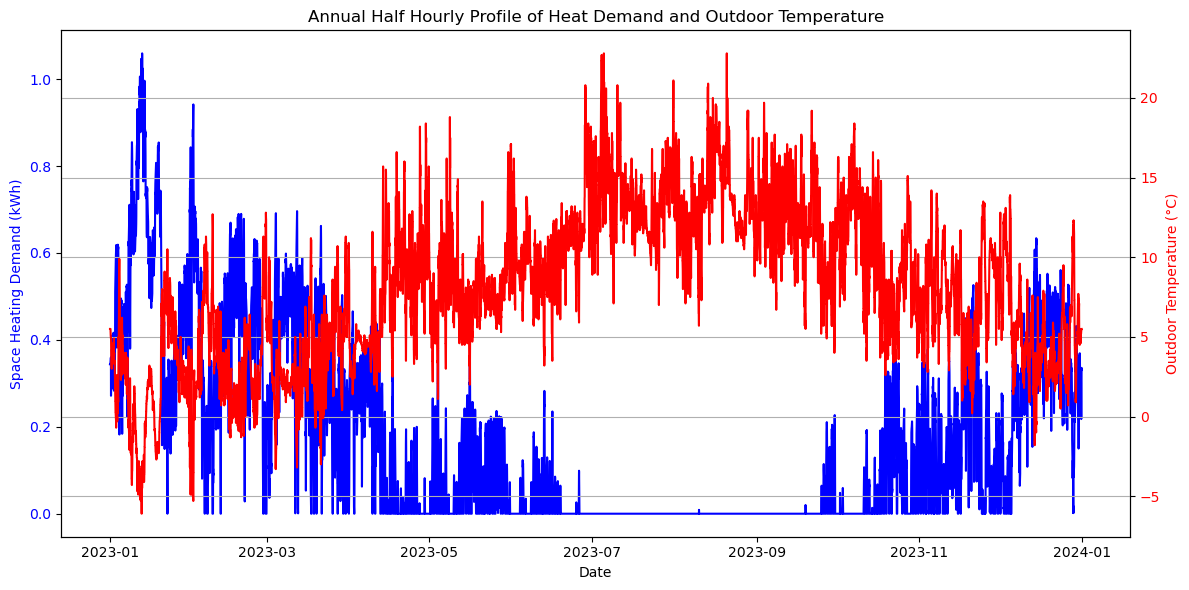

In [10]:
# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Heat Demand on the first y-axis
ax1.plot(df.index, df["Space heating demand (kWh)"], label='Half Hourly Heat Demand', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel("Space Heating Demand (kWh)", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis
ax2 = ax1.twinx()
ax2.plot(df.index, df["Dry-bulb temperature (°C)"], label='Half Hourly Temperature', color='red')
ax2.set_ylabel('Outdoor Temperature (°C)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Title and grid
plt.title('Annual Half Hourly Profile of Heat Demand and Outdoor Temperature')
fig.tight_layout()
plt.grid()
# plt.savefig('')
plt.show()

## Annual hourly profile

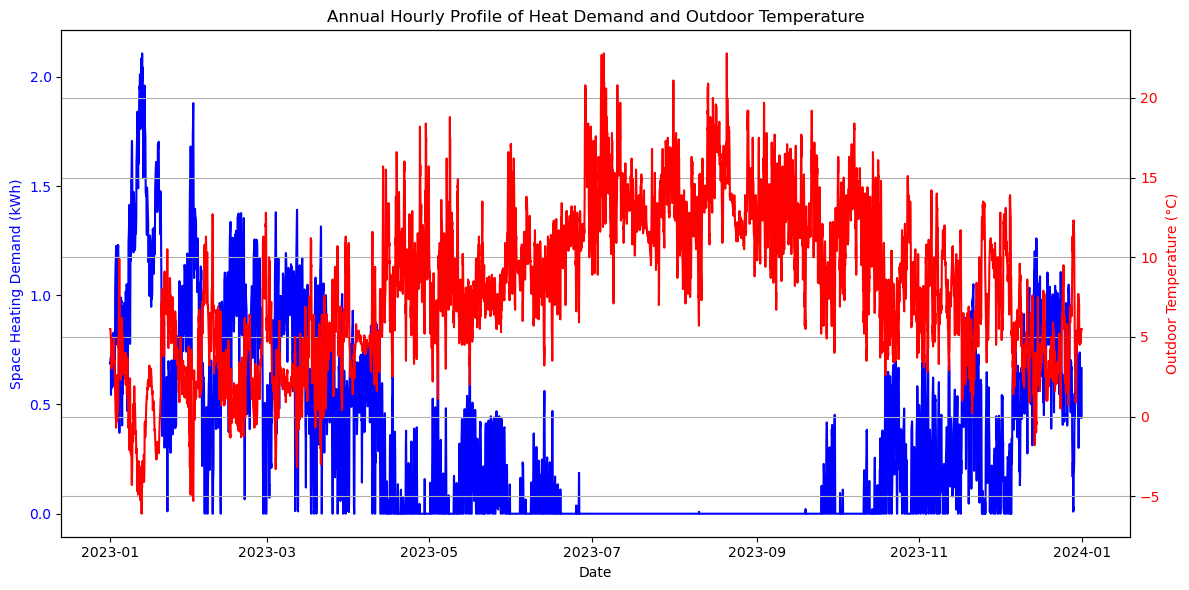

In [11]:
# Resample to hourly frequency and calculate the sum of heat demand and average outdoor temperature
hourly_df = df["Space heating demand (kWh)"].resample('h').sum().to_frame()
hourly_df["Dry-bulb temperature (°C)"] = df["Dry-bulb temperature (°C)"].resample('h').mean()

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Heat Demand on the first y-axis
ax1.plot(hourly_df.index, hourly_df["Space heating demand (kWh)"], label='Hourly Heat Demand', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel("Space Heating Demand (kWh)", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis
ax2 = ax1.twinx()
ax2.plot(hourly_df.index, hourly_df['Dry-bulb temperature (°C)'], label='Hourly Temperature', color='red')
ax2.set_ylabel('Outdoor Temperature (°C)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Title and grid
plt.title('Annual Hourly Profile of Heat Demand and Outdoor Temperature')
fig.tight_layout()
plt.grid()
# plt.savefig('')
plt.show()

In [12]:
print("The average hourly heat demand: {} kWh".format(np.mean(hourly_df["Space heating demand (kWh)"])))
print("The maximum hourly heat demand: {} kWh".format(np.max(hourly_df["Space heating demand (kWh)"])))
print("The minimum hourly heat demand: {} kWh".format(np.min(hourly_df["Space heating demand (kWh)"])))

The average hourly heat demand: 0.3368614269406393 kWh
The maximum hourly heat demand: 2.1073500000000003 kWh
The minimum hourly heat demand: 0.0 kWh


## Daily hourly profile

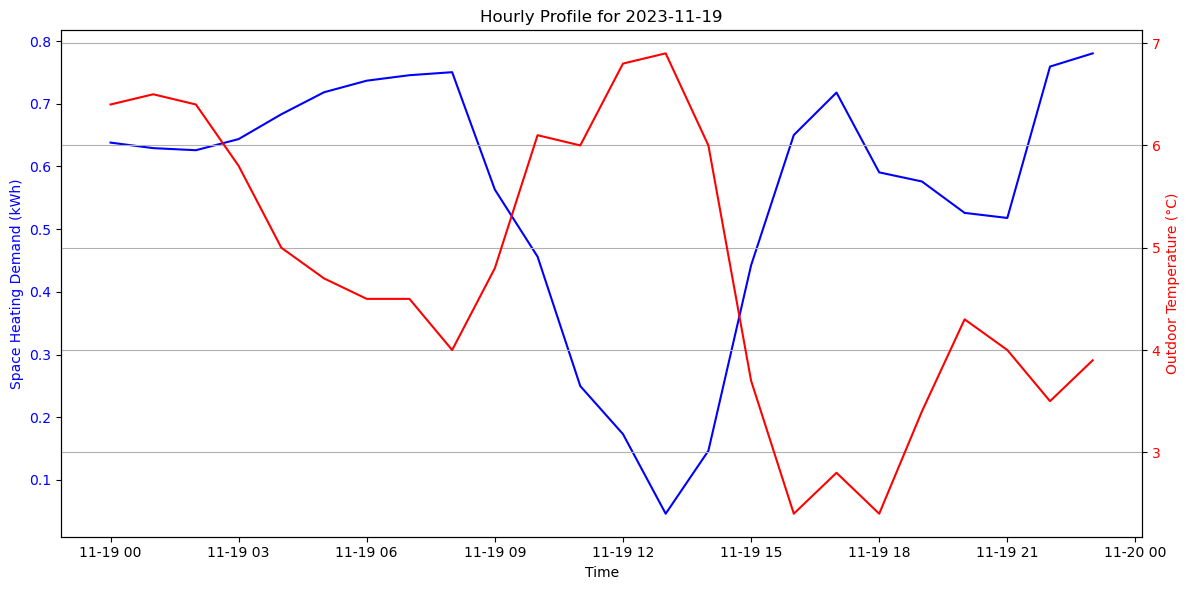

In [13]:
# Specify the day you want to plot
specific_day = '2023-11-19'  # Change this to the desired date

# Filter the data for the specific day
daily_profile = hourly_df.loc[specific_day]

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Heat Demand on the first y-axis
ax1.plot(daily_profile.index, daily_profile["Space heating demand (kWh)"], label='Hourly Heat Demand', color='blue')
ax1.set_xlabel('Time')
ax1.set_ylabel("Space Heating Demand (kWh)", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis
ax2 = ax1.twinx()
ax2.plot(daily_profile.index, daily_profile['Dry-bulb temperature (°C)'], label='Hourly Temperature', color='red')
ax2.set_ylabel('Outdoor Temperature (°C)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Title and grid
plt.title(f'Hourly Profile for {specific_day}')
fig.tight_layout()
plt.grid()
# plt.savefig("")
plt.show()

## Annual daily profile

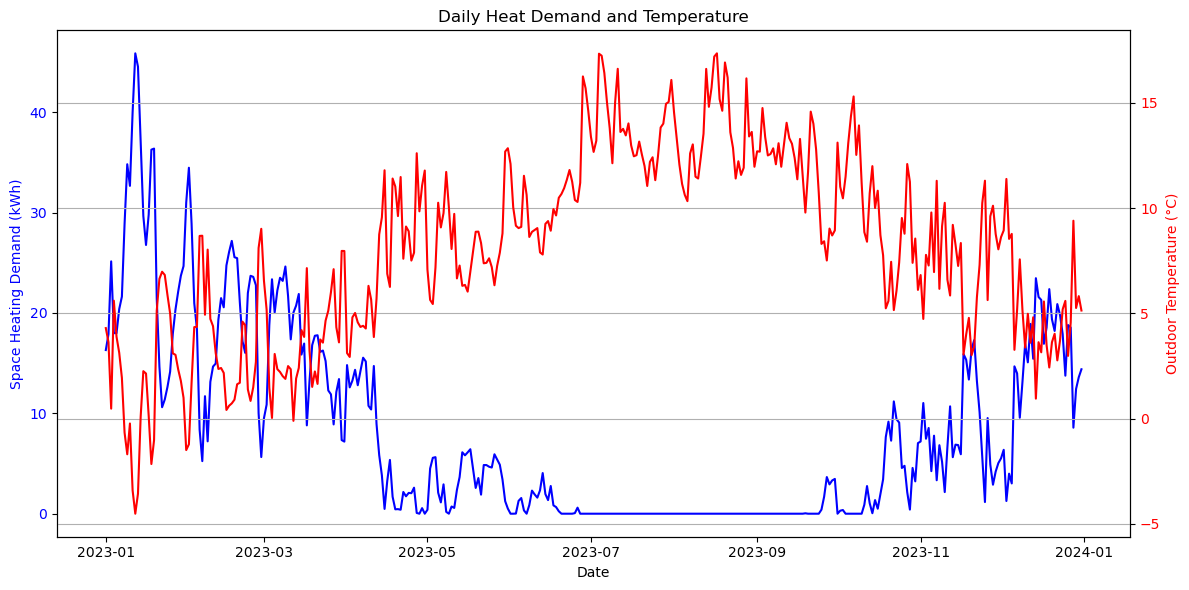

In [14]:
# Resample to daily frequency and calculate the sum of heat demand and average outdoor temperature
daily_df = df["Space heating demand (kWh)"].resample('D').sum().to_frame()
daily_df['Dry-bulb temperature (°C)'] = df["Dry-bulb temperature (°C)"].resample('D').mean()

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Heat Demand on the first y-axis
ax1.plot(daily_df.index, daily_df["Space heating demand (kWh)"], label='Daily Heat Demand', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel("Space Heating Demand (kWh)", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis
ax2 = ax1.twinx()
ax2.plot(daily_df.index, daily_df['Dry-bulb temperature (°C)'], label='Daily Temperature', color='red')
ax2.set_ylabel('Outdoor Temperature (°C)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Title and grid
plt.title('Daily Heat Demand and Temperature')
fig.tight_layout()
plt.grid()
# plt.savefig('')
plt.show()

In [15]:
print("The average daily heat demand: {} kWh".format(np.mean(daily_df["Space heating demand (kWh)"])))
print("The maximum daily heat demand: {} kWh".format(np.max(daily_df["Space heating demand (kWh)"])))
print("The minimum daily heat demand: {} kWh".format(np.min(daily_df["Space heating demand (kWh)"])))

The average daily heat demand: 8.084674246575343 kWh
The maximum daily heat demand: 45.85665 kWh
The minimum daily heat demand: 0.0 kWh


## Monthly daily profile

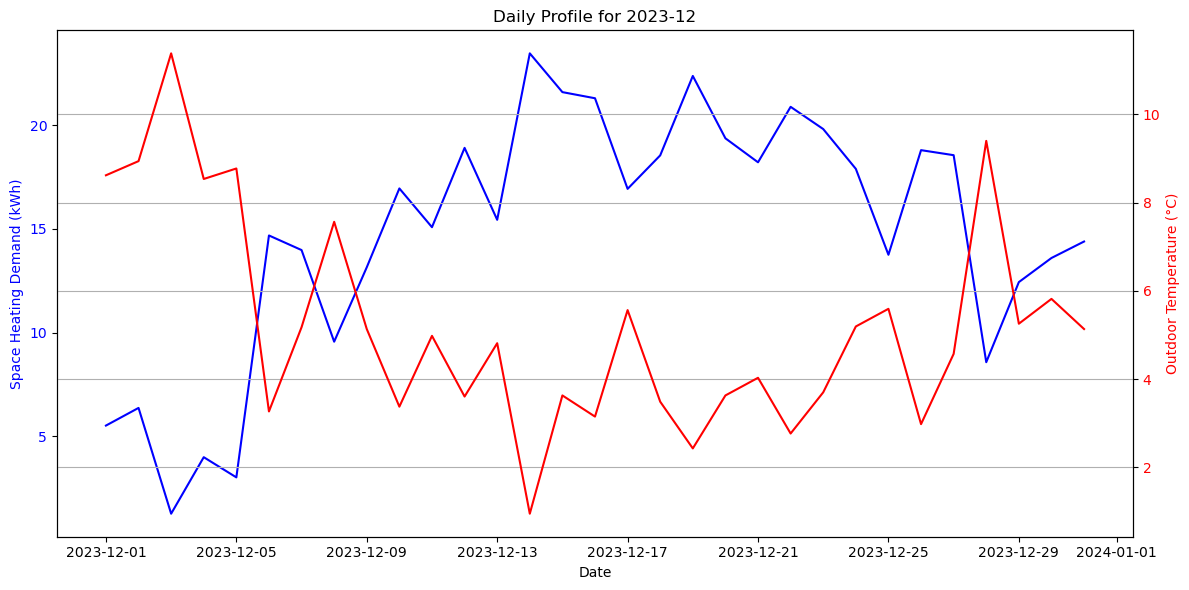

In [16]:
# Specify the month you want to plot
specific_month = '2023-12'  # Change this to the desired month

# Filter the data for the specific month
monthly_profile = daily_df.loc[specific_month]

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Heat Demand on the first y-axis
ax1.plot(monthly_profile.index, monthly_profile["Space heating demand (kWh)"], label='Daily Heat Demand', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel("Space Heating Demand (kWh)", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis
ax2 = ax1.twinx()
ax2.plot(monthly_profile.index, monthly_profile['Dry-bulb temperature (°C)'], label='Daily Temperature', color='red')
ax2.set_ylabel('Outdoor Temperature (°C)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Title and grid
plt.title(f'Daily Profile for {specific_month}')
fig.tight_layout()
plt.grid()
# plt.savefig("")
plt.show()

## Annual monthly profile

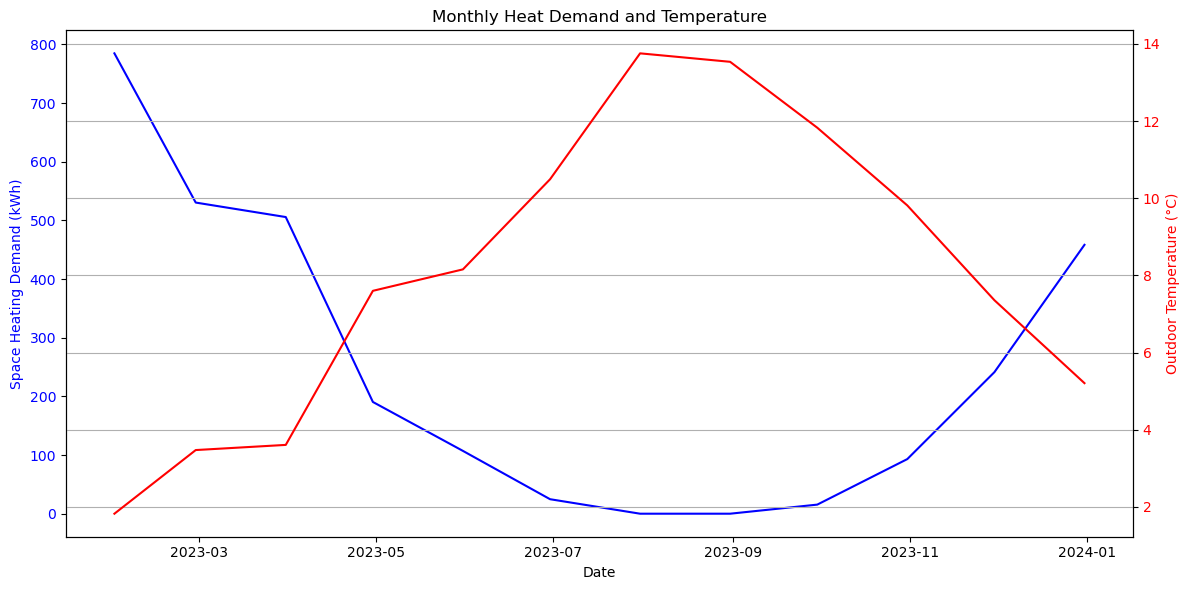

In [17]:
# Resample to daily frequency and calculate the sum of heat demand and average outdoor temperature
monthly_df = df["Space heating demand (kWh)"].resample('ME').sum().to_frame()
monthly_df['Dry-bulb temperature (°C)'] = df["Dry-bulb temperature (°C)"].resample('ME').mean()

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Heat Demand on the first y-axis
ax1.plot(monthly_df.index, monthly_df["Space heating demand (kWh)"], label='Monthly Heat Demand', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel("Space Heating Demand (kWh)", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis
ax2 = ax1.twinx()
ax2.plot(monthly_df.index, monthly_df['Dry-bulb temperature (°C)'], label='Monthly Temperature', color='red')
ax2.set_ylabel('Outdoor Temperature (°C)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Title and grid
plt.title('Monthly Heat Demand and Temperature')
fig.tight_layout()
plt.grid()
# plt.savefig("")
plt.show()

In [18]:
print("The average monthly heat demand: {} kWh".format(np.mean(monthly_df["Space heating demand (kWh)"])))
print("The maximum monthly heat demand: {} kWh".format(np.max(monthly_df["Space heating demand (kWh)"])))
print("The minimum monthly heat demand: {} kWh".format(np.min(monthly_df["Space heating demand (kWh)"])))

The average monthly heat demand: 245.90884166666663 kWh
The maximum monthly heat demand: 784.62565 kWh
The minimum monthly heat demand: 0.0 kWh


# Sensitivity analysis

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

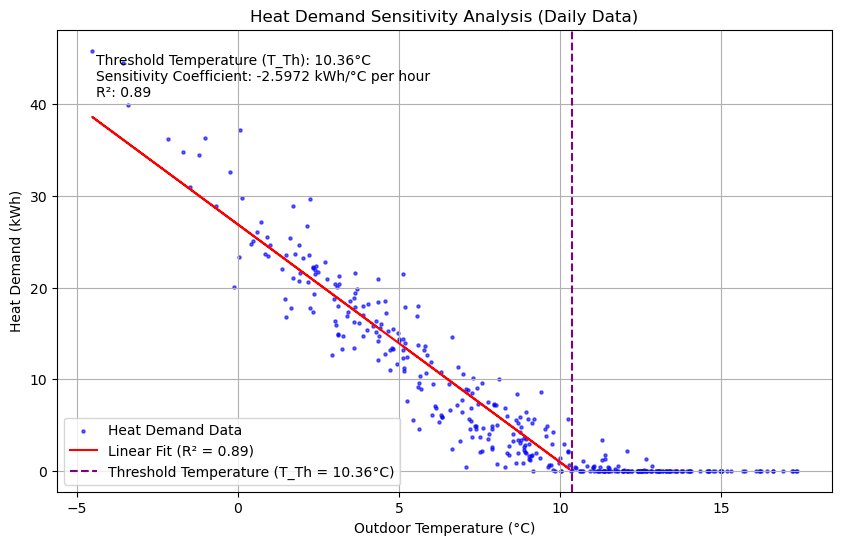

(np.float64(10.359362317755417),
 np.float64(-2.5971740778242096),
 0.8854021522027429)

In [20]:
threshold_demand = 0

# Filter data to include only points with heating demand above the threshold
filtered_data = daily_df[daily_df["Space heating demand (kWh)"] > threshold_demand]

# Reshape temperature values for the regression model
temperatures = filtered_data['Dry-bulb temperature (°C)'].values.reshape(-1, 1)
heating_demand = filtered_data["Space heating demand (kWh)"].values

# Fit LR model
linear_model = LinearRegression()
linear_model.fit(temperatures, heating_demand)

# Calculate the sensitivity coefficient 
sensitivity_coefficient = linear_model.coef_[0]

# Calculate the threshold temperature where heating demand becomes zero (intercept with x-axis)
T_Th = -linear_model.intercept_ / sensitivity_coefficient

# Calculate predicted values only within the temperature where heating demand > 0
predicted_temperatures = temperatures[temperatures <= T_Th].reshape(-1, 1)  
predicted_demand = linear_model.predict(predicted_temperatures)

# Calculate R-squared for the model
r2 = r2_score(heating_demand, linear_model.predict(temperatures))


plt.figure(figsize=(10, 6))
plt.scatter(daily_df['Dry-bulb temperature (°C)'], daily_df["Space heating demand (kWh)"], s=5, color='blue', alpha=0.6, label='Heat Demand Data')

plt.plot(predicted_temperatures, predicted_demand, color='red', linestyle='-', label=f'Linear Fit (R² = {r2:.2f})')

plt.axvline(x=T_Th, color='purple', linestyle='--', label=f'Threshold Temperature (T_Th = {T_Th:.2f}°C)')

plt.title('Heat Demand Sensitivity Analysis (Daily Data)')
plt.xlabel('Outdoor Temperature (°C)')
plt.ylabel('Heat Demand (kWh)')
plt.text(0.05, 0.95, f"Threshold Temperature (T_Th): {T_Th:.2f}°C\n"
                      f"Sensitivity Coefficient: {sensitivity_coefficient:.4f} kWh/°C per hour\n"
                      f"R²: {r2:.2f}",
         transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')
plt.legend()
plt.grid()
# plt.savefig('')
plt.show()

T_Th, sensitivity_coefficient, r2